In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [2]:

from binance.client import Client
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('fivethirtyeight')

# Binance API credentials (replace with your own or use environment variables)

client = Client()

# Define the timeframe
end = datetime.now()
start = datetime(end.year-15, end.month, end.day)

# Fetch historical data from Binance
crypto_pair = input("Enter the cryptocurrency pair (e.g., ETHUSDT, BNBUSDT): ")
klines = client.get_historical_klines(crypto_pair, Client.KLINE_INTERVAL_1DAY, start.strftime("%Y-%m-%d"))

# Convert to DataFrame
stock_data = pd.DataFrame(klines, columns=[
    "timestamp", "open", "high", "low", "close", "volume", 
    "close_time", "quote_asset_volume", "number_of_trades", 
    "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"
])

# Convert timestamp to datetime
stock_data["timestamp"] = pd.to_datetime(stock_data["timestamp"], unit="ms")

# Set index
stock_data.set_index("timestamp", inplace=True)

# Convert relevant columns to numeric
numeric_cols = ["open", "high", "low", "close", "volume"]
stock_data[numeric_cols] = stock_data[numeric_cols].astype(float)

stock_data.head()


Enter the cryptocurrency pair (e.g., ETHUSDT, BNBUSDT):  ETHUSDT


,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
timestamp,,,,,,,,,,,
2017-08-17,301.13,312.18,298.00,302.00,7030.71034,1503014399999,2154655.30035660,4522,6224.58999000,1908705.36853020,0
2017-08-18,302.00,311.79,283.94,293.96,9537.84646,1503100799999,2858946.50935390,5658,7452.43542000,2240813.26122640,0
2017-08-19,293.31,299.90,278.00,290.91,2146.19773,1503187199999,620022.58986170,1795,1537.97550000,444713.61220860,0
2017-08-20,289.41,300.53,282.85,299.10,2510.13871,1503273599999,742847.89455990,2038,2186.68739000,647506.06202050,0
2017-08-21,299.10,346.52,294.60,323.29,5219.44542,1503359999999,1689472.34121400,3925,4004.19967000,1297977.42311420,0


In [3]:
stock_data.head()

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
timestamp,,,,,,,,,,,
2017-08-17,301.13,312.18,298.00,302.00,7030.71034,1503014399999,2154655.30035660,4522,6224.58999000,1908705.36853020,0
2017-08-18,302.00,311.79,283.94,293.96,9537.84646,1503100799999,2858946.50935390,5658,7452.43542000,2240813.26122640,0
2017-08-19,293.31,299.90,278.00,290.91,2146.19773,1503187199999,620022.58986170,1795,1537.97550000,444713.61220860,0
2017-08-20,289.41,300.53,282.85,299.10,2510.13871,1503273599999,742847.89455990,2038,2186.68739000,647506.06202050,0
2017-08-21,299.10,346.52,294.60,323.29,5219.44542,1503359999999,1689472.34121400,3925,4004.19967000,1297977.42311420,0


In [4]:
stock_data.tail()

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
timestamp,,,,,,,,,,,
2025-02-19,2672.00,2736.70,2656.03,2715.50,326154.0202,1740009599999,882047186.13193300,2376004,163604.87670000,442601160.33245900,0
2025-02-20,2715.51,2770.59,2707.18,2738.04,336735.2544,1740095999999,921476439.35493700,2096063,170515.66670000,466756209.20123600,0
2025-02-21,2738.04,2845.32,2616.72,2663.00,890440.0604,1740182399999,2429306635.17723400,3872201,428879.73450000,1170981749.41479300,0
2025-02-22,2663.00,2798.07,2653.33,2763.22,444989.6669,1740268799999,1214059511.89993500,2597168,248387.77720000,677008292.57399600,0
2025-02-23,2763.23,2831.58,2745.41,2815.80,325861.1531,1740355199999,911208115.70096800,1547285,167884.89270000,469491977.52265600,0


In [5]:
stock_data.describe().T

,count,mean,std,min,25%,50%,75%,max
open,2748.0,1.484373e+03,1.234603e+03,8.375000e+01,2.828050e+02,1.327625e+03,2.439675e+03,4.807980e+03
high,2748.0,1.527991e+03,1.268027e+03,8.500000e+01,2.937500e+02,1.371075e+03,2.521613e+03,4.868000e+03
low,2748.0,1.435456e+03,1.196399e+03,8.179000e+01,2.696500e+02,1.282255e+03,2.351240e+03,4.713890e+03
close,2748.0,1.485288e+03,1.234670e+03,8.376000e+01,2.824575e+02,1.328370e+03,2.440178e+03,4.807980e+03
volume,2748.0,5.249955e+05,4.607494e+05,1.060567e+03,2.325976e+05,4.088565e+05,6.811163e+05,4.663240e+06
close_time,2748.0,1.621685e+12,6.855185e+10,1.503014e+12,1.562350e+12,1.621685e+12,1.681020e+12,1.740355e+12
number_of_trades,2748.0,7.941512e+05,1.073408e+06,1.431000e+03,1.613172e+05,4.775570e+05,1.009393e+06,1.055063e+07


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2748 entries, 2017-08-17 to 2025-02-23
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          2748 non-null   float64
 1   high                          2748 non-null   float64
 2   low                           2748 non-null   float64
 3   close                         2748 non-null   float64
 4   volume                        2748 non-null   float64
 5   close_time                    2748 non-null   int64  
 6   quote_asset_volume            2748 non-null   object 
 7   number_of_trades              2748 non-null   int64  
 8   taker_buy_base_asset_volume   2748 non-null   object 
 9   taker_buy_quote_asset_volume  2748 non-null   object 
 10  ignore                        2748 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 257.6+ KB


In [7]:
stock_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'ignore'],
      dtype='object')

In [8]:
#Close price data
closing_price = stock_data[['close']]

In [9]:
closing_price['close']

timestamp
2017-08-17     302.00
2017-08-18     293.96
2017-08-19     290.91
2017-08-20     299.10
2017-08-21     323.29
               ...   
2025-02-19    2715.50
2025-02-20    2738.04
2025-02-21    2663.00
2025-02-22    2763.22
2025-02-23    2815.80
Name: close, Length: 2748, dtype: float64

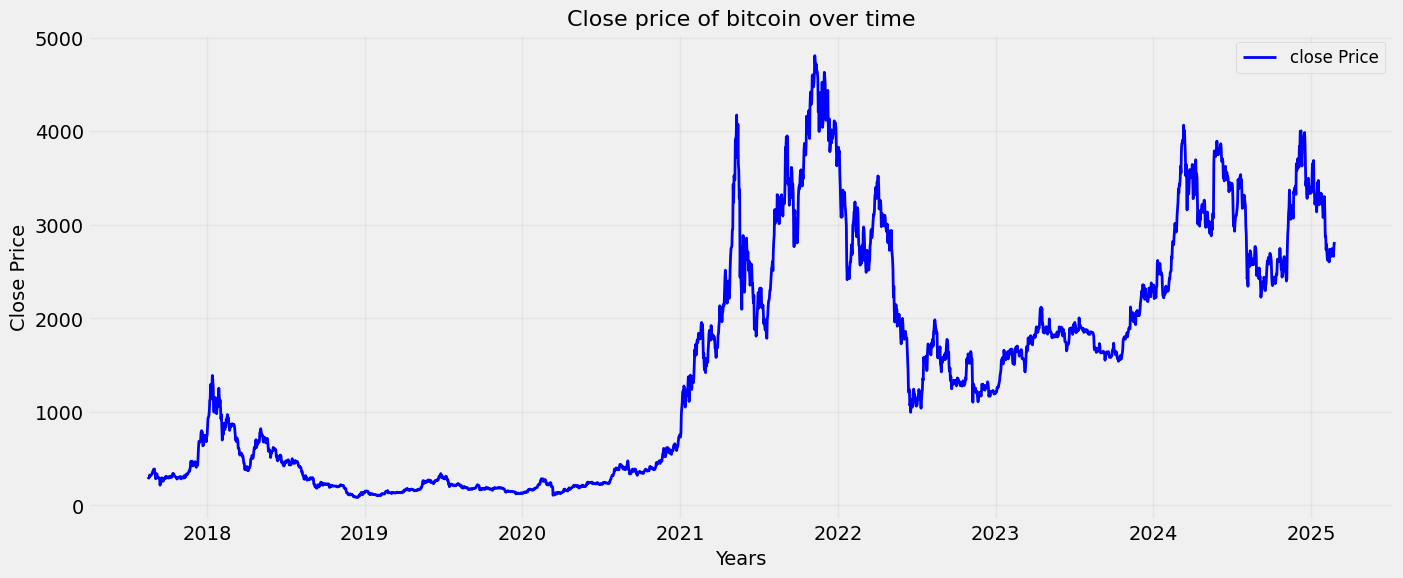

In [10]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['close'], label = 'close Price', color = 'blue', linewidth =2)
plt.title("Close price of bitcoin over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [11]:
# Moving Average
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# moving average for 5 day -> null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)

40.0


In [12]:
df1 = pd.DataFrame(temp_data)

In [13]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [14]:
for i in range(2014, 2024):
    print(i, list(stock_data.index.year).count(i))

2014 0
2015 0
2016 0
2017 137
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365


In [15]:
closing_price['MA_365'] = closing_price['close'].rolling(window = 365).mean()
closing_price['MA_100'] = closing_price['close'].rolling(window = 100).mean()

/tmp/ipykernel_3030/3552797743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['close'].rolling(window = 365).mean()
/tmp/ipykernel_3030/3552797743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['close'].rolling(window = 100).mean()


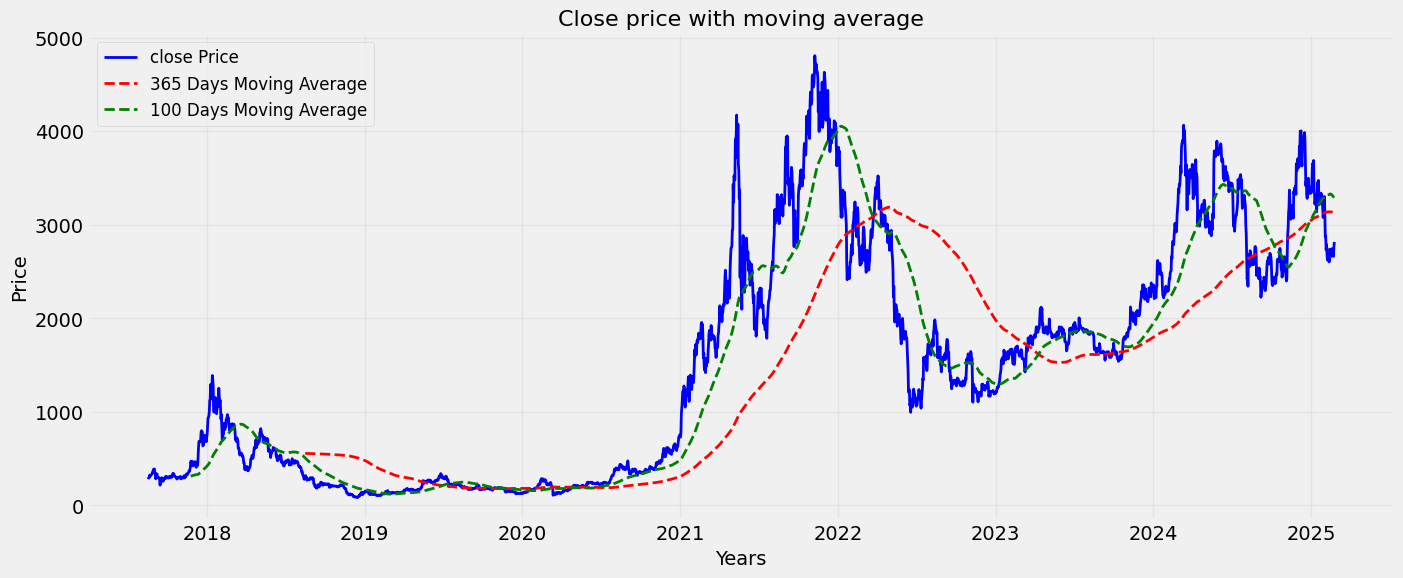

In [16]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['close'], label = 'close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [17]:
# LSTM-> Long short term memory
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['close']].dropna())

In [18]:
len(scaled_data)

2748

In [ ]:
from keras.api.models import Sequential
from keras.api.layers import Dense, LSTM

In [ ]:
# Prepare data for lstm
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [ ]:
# Split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [ ]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.summary()

In [23]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 45s 86ms/step - loss: 0.0053
Epoch 2/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - loss: 9.2841e-04
Epoch 3/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 50s 104ms/step - loss: 7.3064e-04
Epoch 4/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 71s 82ms/step - loss: 5.0150e-04
Epoch 5/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 60s 127ms/step - loss: 6.0431e-04
Epoch 6/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 78s 164ms/step - loss: 5.1657e-04 
Epoch 7/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 79s 164ms/step - loss: 4.6364e-04 
Epoch 8/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 78s 164ms/step - loss: 4.0591e-04 
Epoch 9/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 86s 172ms/step - loss: 5.4761e-04
Epoch 10/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 81s 169ms/step - loss: 3.8396e-04 


In [ ]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step

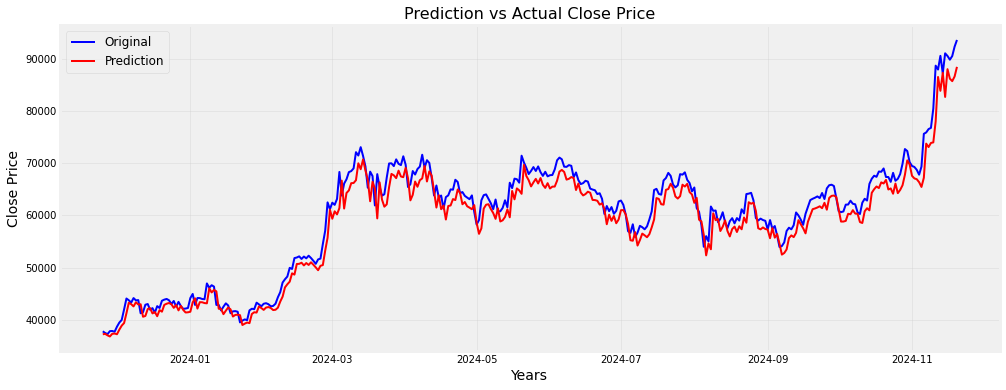

In [39]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(), 
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [40]:
# Predict future days
last_100  = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 [==============================] - 0s 79ms/step


In [42]:
future_predictions

[array([[89482.07]], dtype=float32),
 array([[84445.73]], dtype=float32),
 array([[79918.17]], dtype=float32),
 array([[75903.52]], dtype=float32),
 array([[72325.46]], dtype=float32),
 array([[69118.9]], dtype=float32),
 array([[66238.99]], dtype=float32),
 array([[63653.387]], dtype=float32),
 array([[61335.004]], dtype=float32),
 array([[59258.15]], dtype=float32)]

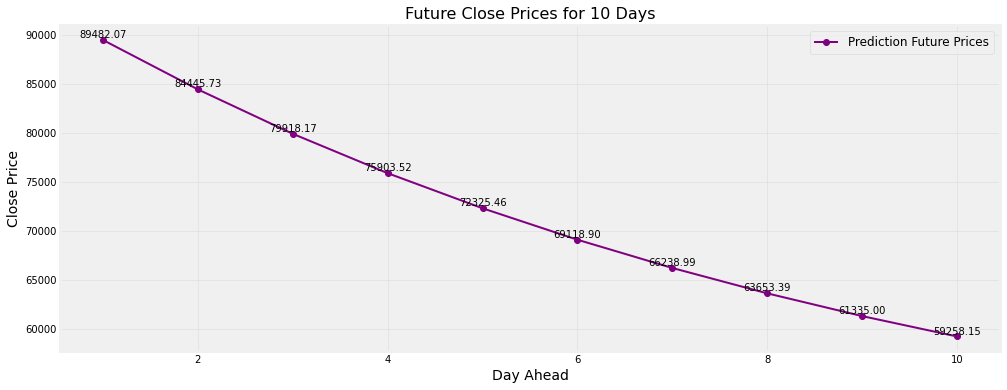

In [44]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [45]:
model.save("model.keras")